---
---
# **`CASE STUDY - 1` :: Healthcare Provider Fraudulent Detection**

<img src="Display_Pic.png" alt="drawing" width="950"/>

---
---


**This notebook contains the:-**
   - **Best trained model**
   - **Most important features**

**Above steps are performed on the publicly available dataset at [Kaggle](https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis).**

**Kindly checkout below link for gaining BUSINESS related insights related to this problem ::**

- [Deck : Detailed Explanation](https://docs.google.com/presentation/d/1Thuw_eZskafkl9W3xYuEVsjgTJKFeEkzEfAmczH96Uw/)


**Kindly checkout below link for TECHNICAL design document ::**

- [Technical Document](https://docs.google.com/document/d/10z9xbn4dZWkforlAszCDaa1M0roAW-MOf2pjJHSnEXk/)


**Kindly checkout below link for In-depth Description and Reasoning of all the Features ::**

- [Features Description](https://docs.google.com/spreadsheets/d/1ktwjad3U-hGT_7yccGyZC4AzGhWAMs3RHrIMk8Gi8xQ/)

# **`Notebook Contents`**

>[CASE STUDY - 1 :: Healthcare Provider Fraudulent Detection](#scrollTo=naPWqtUVigTd)

>[Notebook Contents](#scrollTo=PHkkU2ExpgPR)

>>[Importing_Libraries](#scrollTo=ThPD8j4PnuVH)

>>[Importing_Dataset](#scrollTo=c16_htZKnucm)

>>[Best Model Training](#scrollTo=z532QrJwYxGI)

>>>[Using Class Weighting Scheme](#scrollTo=rJLrpM66qKvk)

>>>>[1. Random Forest Classifier](#scrollTo=nPY846BaqKv7)

>>>>[2. Random Forest Classifier](#scrollTo=2h0-zaM0Vl3Z)

>>>>[3. Random Forest Classifier](#scrollTo=OWb9GXeOVl3i)

>>>>[4. Random Forest Classifier](#scrollTo=6jHWZut6Vl3q)

>>>>[5. Random Forest Classifier](#scrollTo=X4vmwnf5Vl3x)

>>>>[6. Random Forest Classifier](#scrollTo=2vAllZHQVl33)

>>>[Most Important Features](#scrollTo=PO8XcsiRVl3_)

>>>[SUMMARY](#scrollTo=GwwaT3AkVl4B)

>>>[OBSERVATIONS](#scrollTo=_5TYLTQOVl4C)



## **Importing_Libraries**

In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',50)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif','size':16.5,'color':'Blue','style':'italic'}

## **Importing_Dataset**

In [3]:
X_train_std = pd.read_csv("X_train_std.csv", index_col=0)
X_test_std = pd.read_csv("X_test_std.csv", index_col=0)

y_train = pd.read_csv("y_train.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)

In [4]:
X_train_std.shape, X_test_std.shape

((4328, 299), (1082, 299))

In [5]:
y_train.shape, y_test.shape

((4328, 1), (1082, 1))

In [6]:
X_train_std.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,Admitted_Duration,Bene_Age,Att_Opr_Oth_Phy_Tot_Claims,Prv_Tot_Att_Opr_Oth_Phys,PRV_Tot_Admit_DCodes,PRV_Tot_DGrpCodes,PRV_Tot_Unq_DOB_Years,PRV_Bene_Age_Sum,PRV_Insc_Clm_ReImb_Amt,PRV_Tot_RKD_Patients,PRV_CoPayment,PRV_IP_Annual_ReImb_Amt,PRV_IP_Annual_Ded_Amt,PRV_OP_Annual_ReImb_Amt,PRV_OP_Annual_Ded_Amt,PRV_Admit_Duration,PRV_Claim_Duration,BENE_Insc_ReImb_Amt,BENE_CoPayment,BENE_IP_Annual_ReImb_Amt,BENE_IP_Annual_Ded_Amt,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_7,ClmCount_Provider_BeneID_ClmDiagnosisCode_8,ClmCount_Provider_BeneID_ClmDiagnosisCode_9,ClmCount_Provider_BeneID_ClmDiagnosisCode_10,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Gender_1,Race_2,Race_3,Race_5,Admitted?_1,Is_Alive?_1
0,-0.182674,-0.058134,0.066667,0.064516,-0.133333,0.000000,0.333333,-0.12,-0.147059,-0.090909,-0.094828,-0.20,0.125000,-0.125,-0.187730,-0.119279,-0.036823,-0.087869,-0.183099,0.000000,-0.061720,-0.123223,-0.041747,-0.079358,0.000000,-0.030706,-0.037340,-0.092315,0.006942,-0.051422,-0.068955,-0.047629,-0.030622,-0.041492,0.000000,-0.059830,-0.185478,-0.159881,-0.147391,-0.064278,...,-0.1,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060606,-0.125,0.0,0.0,0.0,0.0
1,-0.234971,-0.058134,-0.333333,-0.354839,-0.422222,-0.363636,-0.333333,-0.32,-0.294118,-0.381818,-0.353448,-0.32,-0.375000,-0.250,-0.341134,-0.325688,-0.325392,-0.350485,-0.246479,0.000000,-0.357190,-0.181499,-0.128947,-0.135641,0.000000,-0.201375,-0.127382,-0.113971,-0.116626,-0.051422,-0.123457,-0.124352,-0.120998,-0.122344,0.000000,-0.111332,-0.346535,-0.339486,-0.316786,-0.308256,...,-0.4,-0.375,-0.285714,

In [7]:
X_test_std.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,Admitted_Duration,Bene_Age,Att_Opr_Oth_Phy_Tot_Claims,Prv_Tot_Att_Opr_Oth_Phys,PRV_Tot_Admit_DCodes,PRV_Tot_DGrpCodes,PRV_Tot_Unq_DOB_Years,PRV_Bene_Age_Sum,PRV_Insc_Clm_ReImb_Amt,PRV_Tot_RKD_Patients,PRV_CoPayment,PRV_IP_Annual_ReImb_Amt,PRV_IP_Annual_Ded_Amt,PRV_OP_Annual_ReImb_Amt,PRV_OP_Annual_Ded_Amt,PRV_Admit_Duration,PRV_Claim_Duration,BENE_Insc_ReImb_Amt,BENE_CoPayment,BENE_IP_Annual_ReImb_Amt,BENE_IP_Annual_Ded_Amt,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_7,ClmCount_Provider_BeneID_ClmDiagnosisCode_8,ClmCount_Provider_BeneID_ClmDiagnosisCode_9,ClmCount_Provider_BeneID_ClmDiagnosisCode_10,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Gender_1,Race_2,Race_3,Race_5,Admitted?_1,Is_Alive?_1
0,-0.170577,-0.024379,-0.333333,0.064516,-0.133333,-0.212121,-0.250000,-0.16,-0.058824,-0.072727,0.008621,0.04,0.166667,-0.25,-0.101042,-0.255898,-0.178825,-0.129824,-0.176056,0.000000,-0.028692,-0.002457,-0.016415,-0.072604,0.000000,-0.020709,-0.016848,-0.084930,-0.099271,-0.032324,-0.034591,-0.082459,-0.064228,-0.045173,0.000000,-0.050967,-0.092540,-0.208554,-0.071047,-0.230497,...,-0.3,-0.250,-0.142857,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.212121,0.375,0.0,0.0,0.0,0.0
1,-0.131843,-0.046882,-0.200000,-0.129032,-0.244444,-0.181818,-0.250000,-0.24,-0.264706,-0.181818,-0.232759,-0.20,-0.208333,-0.25,-0.276212,-0.302424,-0.179103,-0.241639,-0.387324,0.000000,-0.235989,-0.167457,-0.110077,-0.130575,0.000000,-0.160671,-0.106705,-0.094325,-0.092329,-0.048568,-0.109890,-0.114008,-0.096569,-0.104172,0.000000,-0.117445,-0.240759,-0.279884,-0.275309,-0.299924,...,-0.4,-0.375,-0.28571

In [8]:
np.ravel(y_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
np.ravel(y_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## **`Best Model Training`**

### **`Using Class Weighting Scheme`**

In [10]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

In [11]:
def pred_prob(clf, data): 
    """
    Description :: This function is created for storing the predicted probabability using the trained model.
    
    Input :: It accepts below input parameters :
      - clf : Trained model classifier
      - data : Dataset for which we want to generate the predictions
    """
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    """
    Description :: This function is created for calculating the AUC score on train and test data. And, plotting the ROC curve.
    
    Input :: It accepts below input parameters :
      - train_fpr : Train False +ve rate
      - train_tpr : Train True +ve rate
      - test_fpr : Test False +ve rate
      - test_tpr : Test True +ve rate
    """
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    with plt.style.context('seaborn-poster'):
      plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
      plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
      plt.legend()
      plt.xlabel("False Positive Rate(FPR)", fontdict=label_font_dict)
      plt.ylabel("True Positive Rate(TPR)", fontdict=label_font_dict)
      plt.title("Area Under Curve", fontdict=title_font_dict)
      plt.grid(b=True, which='major', color='lightgrey', linestyle='--')
      plt.minorticks_on()
      plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    """
    Description :: This function is created for finding the best threshold value.
    """
    t = threshold[np.argmax(tpr * (1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    """
    Description :: This function is created for generating the predictions based on the best threshold value.
    """
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    """
    Description :: This function is created for plotting the confusion matrix of TRAIN and TEST sets.
    """
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='viridis')
        ax[0].set_title('Train Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[0].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[0].set_ylabel("Actual Label", fontdict=label_font_dict)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='summer')
        ax[1].set_title('Test Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[1].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[1].set_ylabel("Actual Label", fontdict=label_font_dict)
    
    plt.show()
    
    return train_prediction, test_prediction

In [12]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    """
    Description :: This function is created for performing the evaluation of the trained model.
    """
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    
    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("### Train AUC = {}".format(train_auc))
    test_auc = auc(test_fpr, test_tpr)
    print("### Test AUC = {}".format(test_auc))
    
    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)
    
    return test_auc, train_f1_score, test_f1_score, best_t

#### **`1. Random Forest Classifier`**
- **Random State = 39**

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=39,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, np.ravel(y_train))

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=39)

### Train AUC = 0.9488467820356681
### Test AUC = 0.9516304841493324


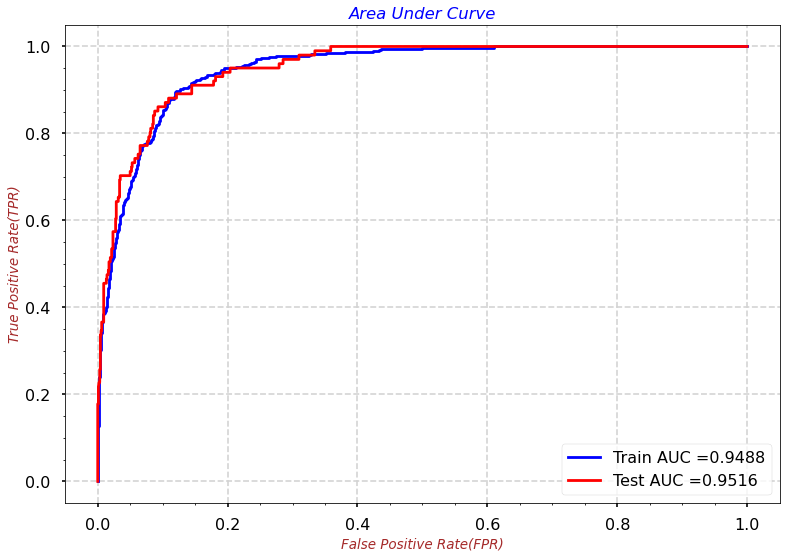

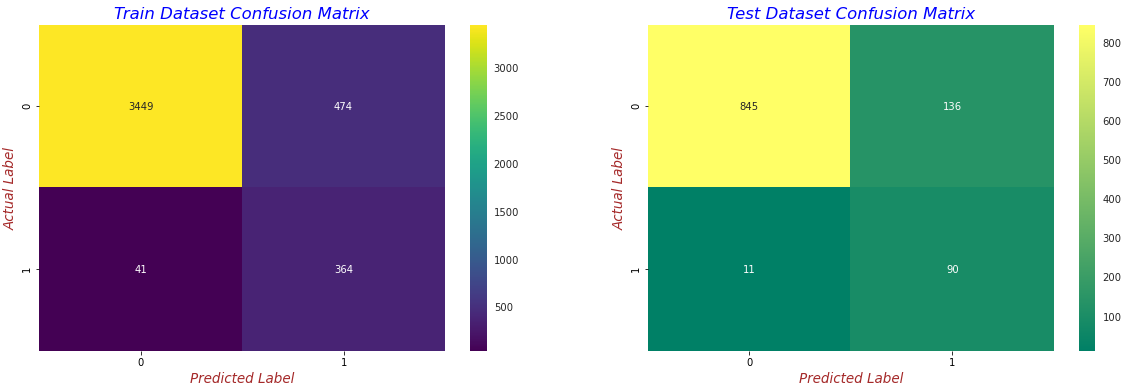



### Best Threshold = 0.5320
### Model AUC is : 0.9516
### Model Train F1 Score is : 0.5857
### Model Test F1 Score is : 0.5505


In [15]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, np.ravel(y_train), np.ravel(y_test))

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [16]:
feats_imps_1 = pd.DataFrame({'Features': X_train_std.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps_1 = feats_imps_1[feats_imps_1['Importance_Model_1'] != 0]
feats_imps_1.reset_index(drop=True, inplace=True)
feats_imps_1.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.071886
1,DeductibleAmtPaid,0.026002
2,ChronicCond_Alzheimer,0.000399
3,ChronicCond_ObstrPulmonary,0.000497
4,ChronicCond_Depression,0.000077


In [17]:
top_20_pos_feats_1 = feats_imps_1.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores_1 = feats_imps_1.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

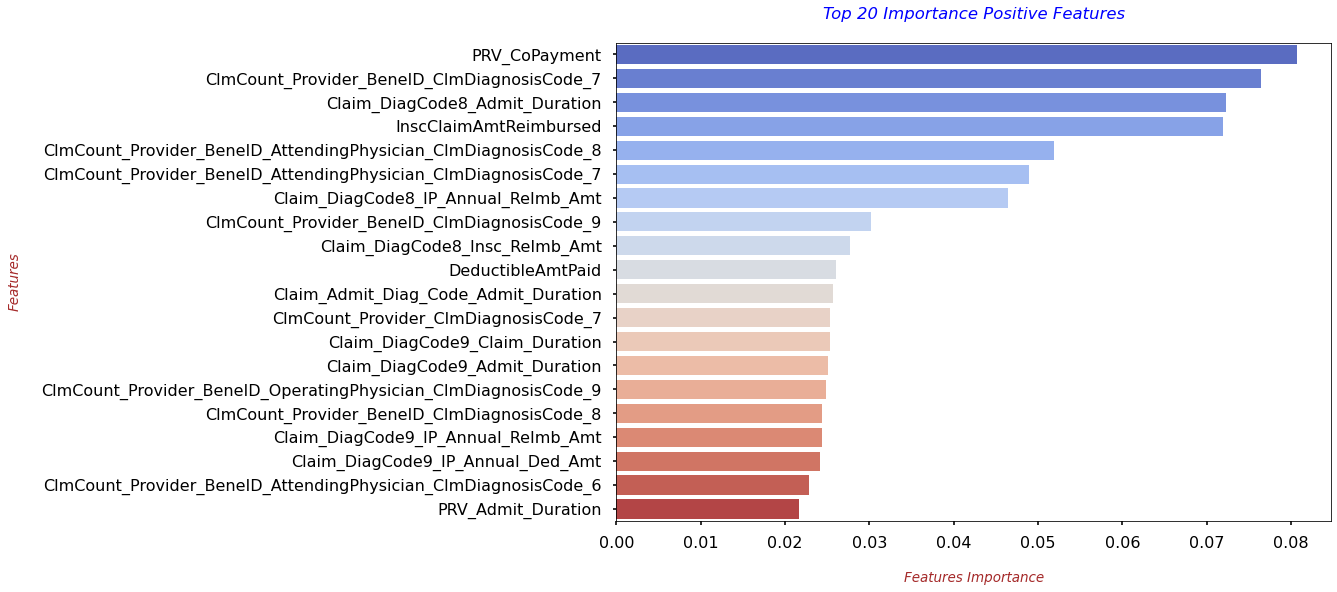

In [18]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats_1, x=top_20_pos_feats_scores_1, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 20 Importance Positive Features\n", fontdict=title_font_dict)

In [19]:
result_feats_scrs_1 = pd.DataFrame({'Feature': top_20_pos_feats_1, 'Imp_Score': top_20_pos_feats_scores_1})
result_feats_scrs_1

,Feature,Imp_Score
13,PRV_CoPayment,0.080663
157,ClmCount_Provider_BeneID_ClmDiagnosisCode_7,0.076483
99,Claim_DiagCode8_Admit_Duration,0.072255
0,InscClaimAmtReimbursed,0.071886
147,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.051932
146,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.048924
95,Claim_DiagCode8_IP_Annual_ReImb_Amt,0.046371
159,ClmCount_Provider_BeneID_ClmDiagnosisCode_9,0.030150
93,Claim_DiagCode8_Insc_ReImb_Amt,0.027663
1,DeductibleAmtPaid,0.026002


#### **`2. Random Forest Classifier`**
- **Random State = 44**

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=44,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, np.ravel(y_train))

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=44)

### Train AUC = 0.9478246366002335
### Test AUC = 0.9501821741807208


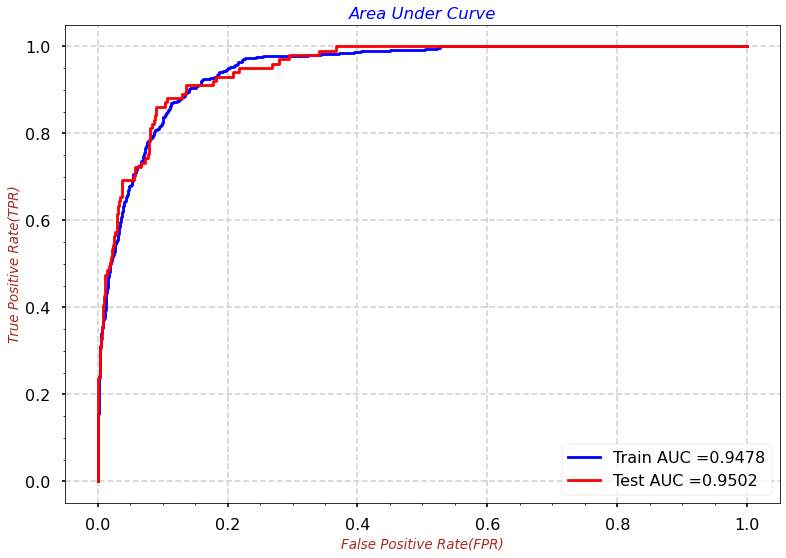

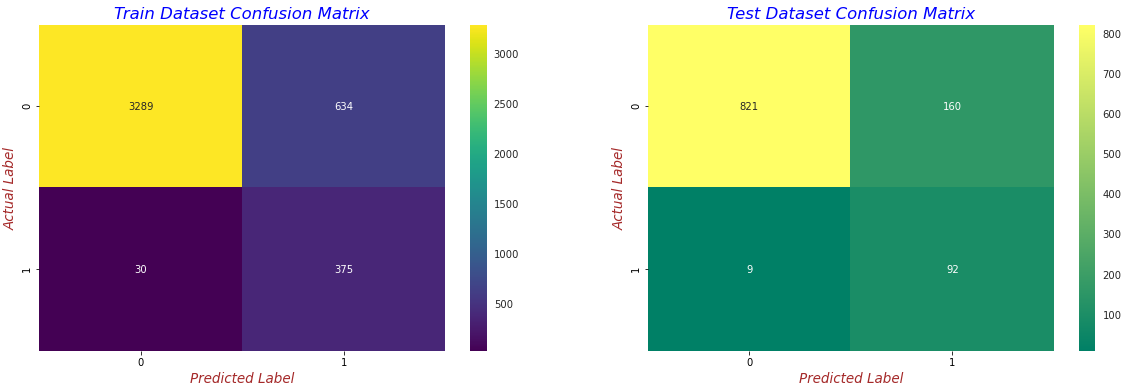



### Best Threshold = 0.4551
### Model AUC is : 0.9502
### Model Train F1 Score is : 0.5304
### Model Test F1 Score is : 0.5212


In [22]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, np.ravel(y_train), np.ravel(y_test))

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [23]:
feats_imps_2 = pd.DataFrame({'Features': X_train_std.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps_2 = feats_imps_2[feats_imps_2['Importance_Model_1'] != 0]
feats_imps_2.reset_index(drop=True, inplace=True)
feats_imps_2.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.086963
1,DeductibleAmtPaid,0.013234
2,RenalDiseaseIndicator,0.000061
3,ChronicCond_ObstrPulmonary,0.000048
4,ChronicCond_stroke,0.000925


In [24]:
top_20_pos_feats_2 = feats_imps_2.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores_2 = feats_imps_2.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

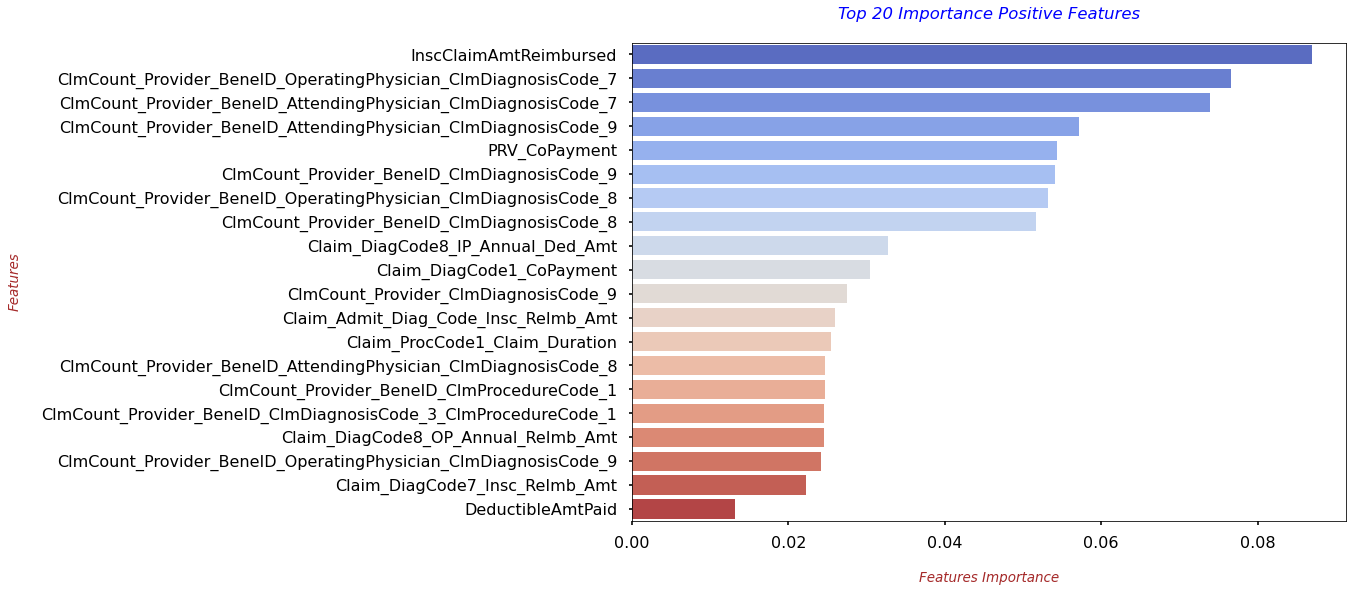

In [25]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats_2, x=top_20_pos_feats_scores_2, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 20 Importance Positive Features\n", fontdict=title_font_dict)

In [26]:
result_feats_scrs_2 = pd.DataFrame({'Feature': top_20_pos_feats_2, 'Imp_Score': top_20_pos_feats_scores_2})
result_feats_scrs_2

,Feature,Imp_Score
0,InscClaimAmtReimbursed,0.086963
146,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.076609
141,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.073964
143,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.057129
16,PRV_CoPayment,0.054315
158,ClmCount_Provider_BeneID_ClmDiagnosisCode_9,0.054092
147,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.053172
157,ClmCount_Provider_BeneID_ClmDiagnosisCode_8,0.051664
91,Claim_DiagCode8_IP_Annual_Ded_Amt,0.032744
58,Claim_DiagCode1_CoPayment,0.030437


#### **`3. Random Forest Classifier`**
- **Random State = 108**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=108,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, np.ravel(y_train))

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=108)

### Train AUC = 0.9481547568470841
### Test AUC = 0.9483654787497098


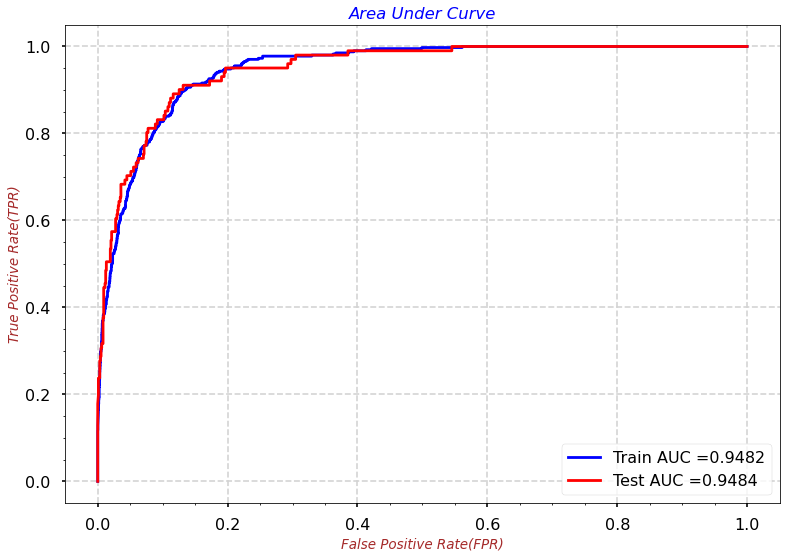

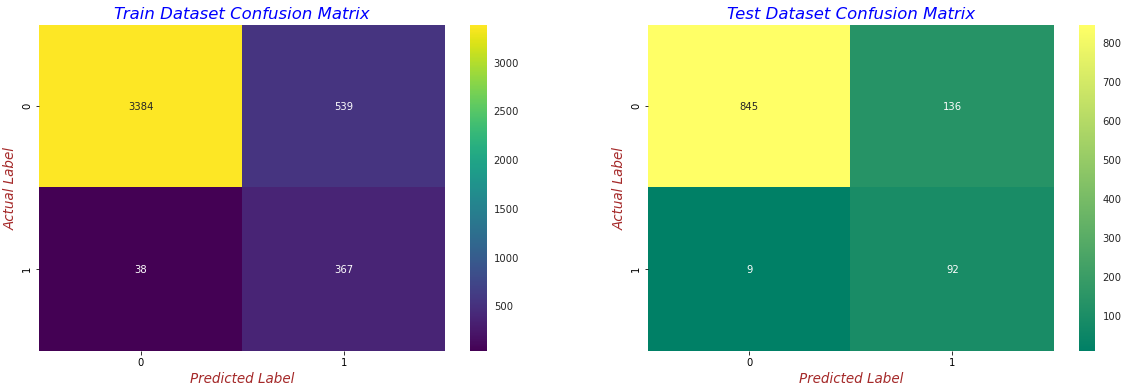



### Best Threshold = 0.5114
### Model AUC is : 0.9484
### Model Train F1 Score is : 0.5599
### Model Test F1 Score is : 0.5593


In [29]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, np.ravel(y_train), np.ravel(y_test))

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [30]:
feats_imps_3 = pd.DataFrame({'Features': X_train_std.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps_3 = feats_imps_3[feats_imps_3['Importance_Model_1'] != 0]
feats_imps_3.reset_index(drop=True, inplace=True)
feats_imps_3.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.087687
1,DeductibleAmtPaid,0.009481
2,RenalDiseaseIndicator,0.000163
3,ChronicCond_KidneyDisease,0.000331
4,ChronicCond_Depression,0.000322


In [31]:
top_20_pos_feats_3 = feats_imps_3.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores_3 = feats_imps_3.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

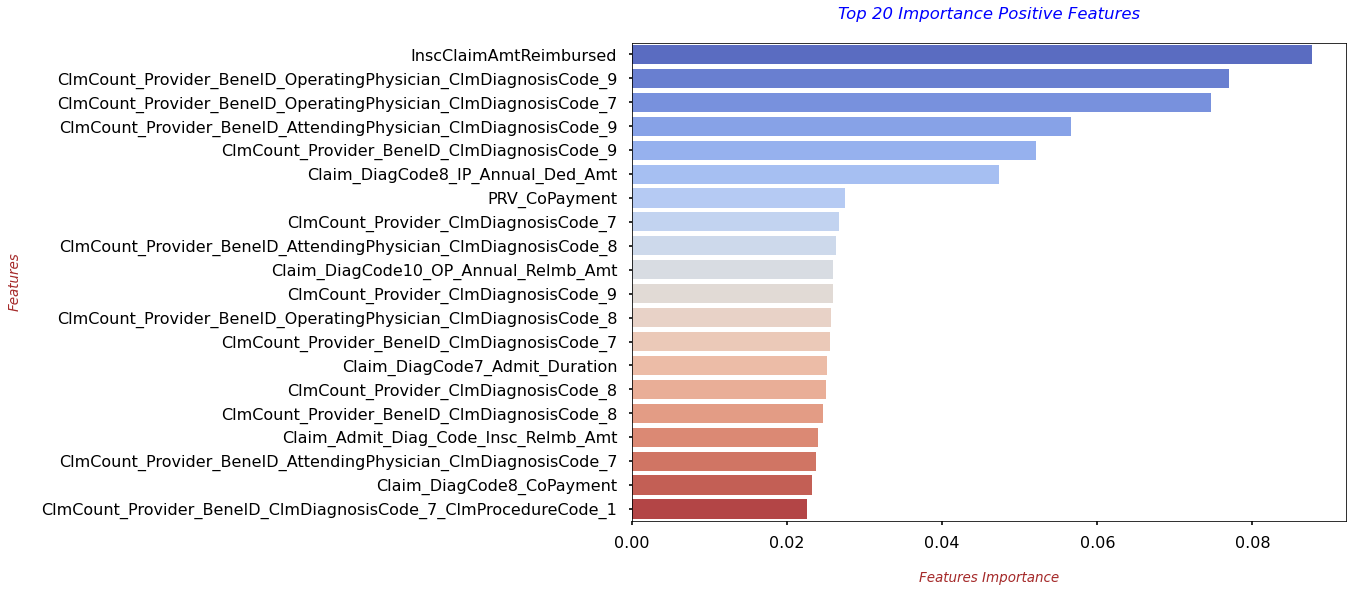

In [32]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats_3, x=top_20_pos_feats_scores_3, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 20 Importance Positive Features\n", fontdict=title_font_dict)

In [33]:
result_feats_scrs_3 = pd.DataFrame({'Feature': top_20_pos_feats_3, 'Imp_Score': top_20_pos_feats_scores_3})
result_feats_scrs_3

,Feature,Imp_Score
0,InscClaimAmtReimbursed,0.087687
150,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.076967
148,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.074627
144,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.056557
160,ClmCount_Provider_BeneID_ClmDiagnosisCode_9,0.052157
98,Claim_DiagCode8_IP_Annual_Ded_Amt,0.047358
18,PRV_CoPayment,0.027523
130,ClmCount_Provider_ClmDiagnosisCode_7,0.026718
143,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.026331
111,Claim_DiagCode10_OP_Annual_ReImb_Amt,0.025942


#### **`4. Random Forest Classifier`**
- **Random State = 11**

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=11,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, np.ravel(y_train))

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=11)

### Train AUC = 0.9464100603279804
### Test AUC = 0.9509593161150978


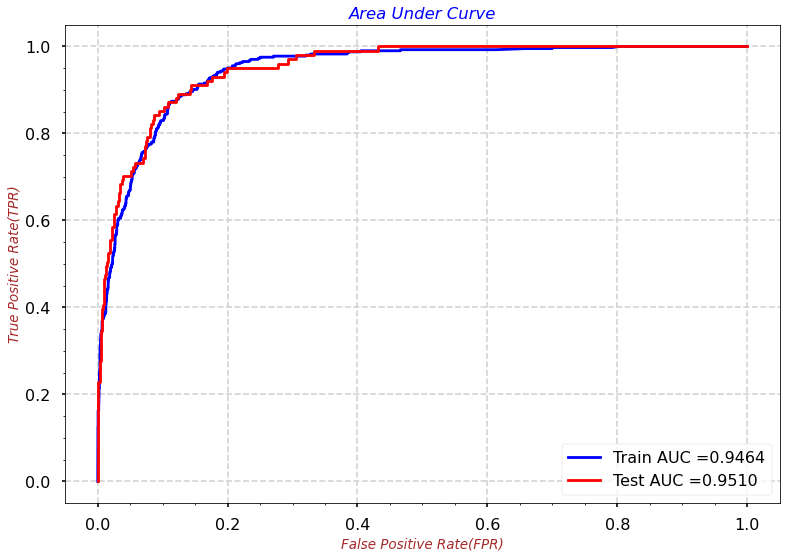

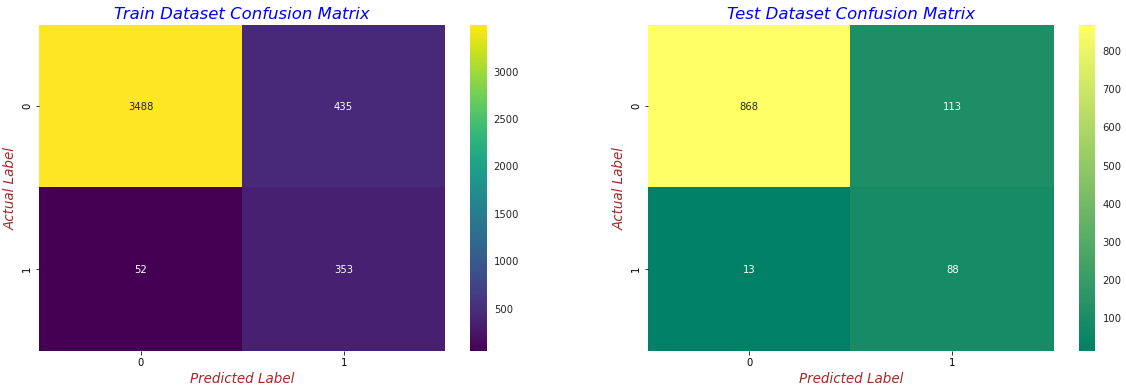



### Best Threshold = 0.5567
### Model AUC is : 0.9510
### Model Train F1 Score is : 0.5918
### Model Test F1 Score is : 0.5828


In [36]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, np.ravel(y_train), np.ravel(y_test))

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [40]:
# Exporting the best model
import joblib

# Dumping the best model
joblib.dump(rfc_3, 'best_model.pkl') 

# Loading the best model
rfc_3 = joblib.load('best_model.pkl')

In [37]:
feats_imps_4 = pd.DataFrame({'Features': X_train_std.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps_4 = feats_imps_4[feats_imps_4['Importance_Model_1'] != 0]
feats_imps_4.reset_index(drop=True, inplace=True)
feats_imps_4.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.065302
1,DeductibleAmtPaid,0.054782
2,RenalDiseaseIndicator,0.000297
3,ChronicCond_ObstrPulmonary,0.000880
4,ChronicCond_Osteoporasis,0.000377


In [38]:
top_20_pos_feats_4 = feats_imps_4.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores_4 = feats_imps_4.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

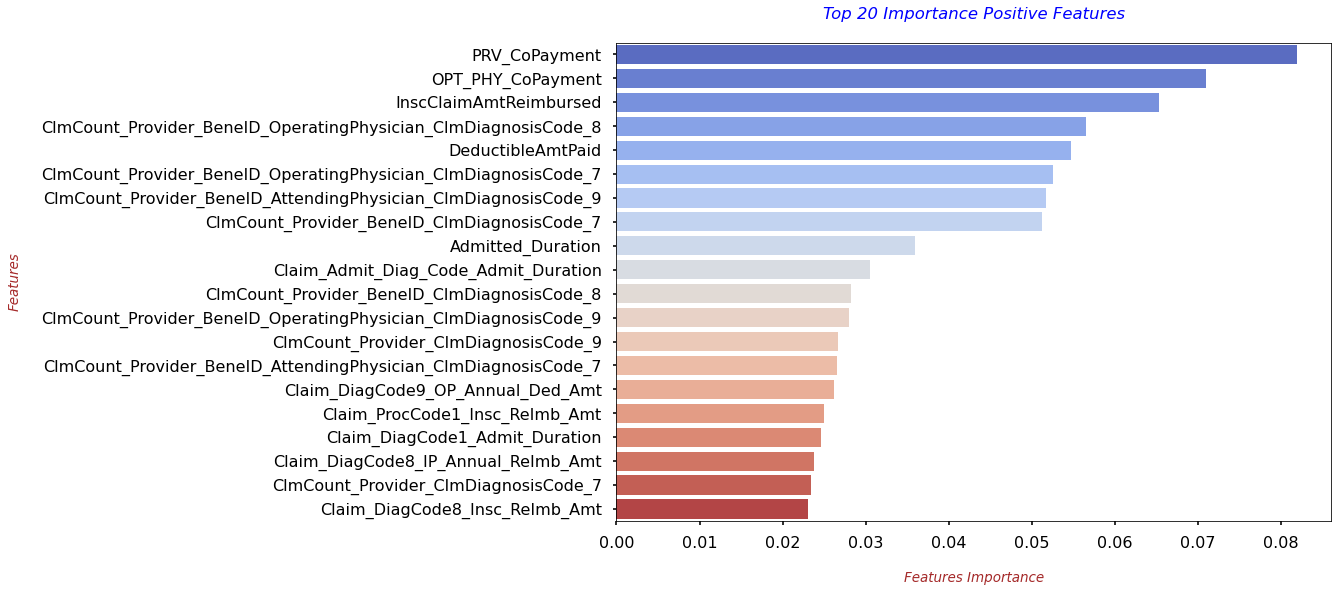

In [39]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats_4, x=top_20_pos_feats_scores_4, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 20 Importance Positive Features\n", fontdict=title_font_dict)

In [40]:
result_feats_scrs_4 = pd.DataFrame({'Feature': top_20_pos_feats_4, 'Imp_Score': top_20_pos_feats_scores_4})
result_feats_scrs_4

,Feature,Imp_Score
17,PRV_CoPayment,0.081920
35,OPT_PHY_CoPayment,0.070996
0,InscClaimAmtReimbursed,0.065302
145,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.056550
1,DeductibleAmtPaid,0.054782
144,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.052589
142,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.051732
153,ClmCount_Provider_BeneID_ClmDiagnosisCode_7,0.051206
10,Admitted_Duration,0.035899
50,Claim_Admit_Diag_Code_Admit_Duration,0.030555


#### **`5. Random Forest Classifier`**
- **Random State = 76**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=76,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, np.ravel(y_train))

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=76)

### Train AUC = 0.949095080295692
### Test AUC = 0.9506060697812899


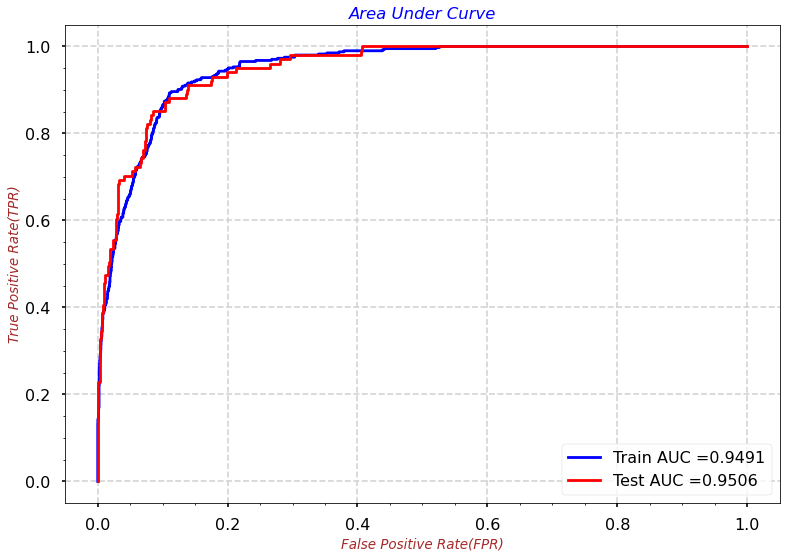

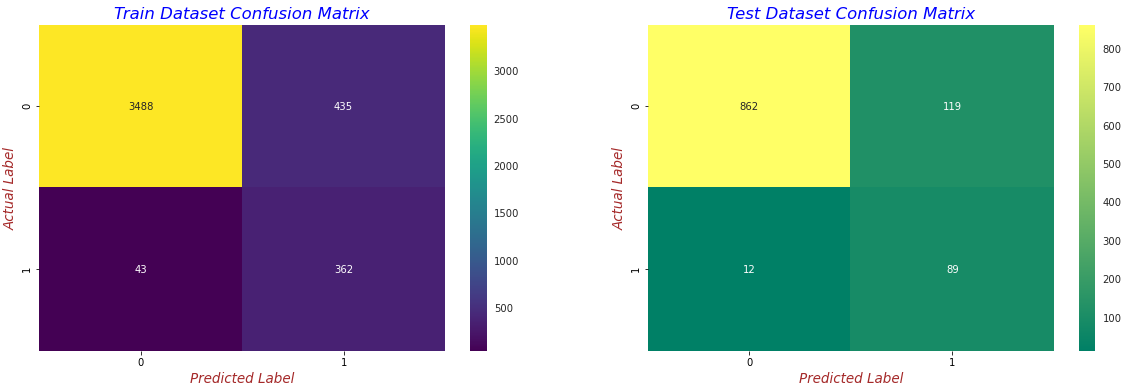



### Best Threshold = 0.5668
### Model AUC is : 0.9506
### Model Train F1 Score is : 0.6023
### Model Test F1 Score is : 0.5761


In [43]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, np.ravel(y_train), np.ravel(y_test))

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [44]:
feats_imps_5 = pd.DataFrame({'Features': X_train_std.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps_5 = feats_imps_5[feats_imps_5['Importance_Model_1'] != 0]
feats_imps_5.reset_index(drop=True, inplace=True)
feats_imps_5.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.069001
1,DeductibleAmtPaid,0.026195
2,RenalDiseaseIndicator,0.000355
3,ChronicCond_Heartfailure,0.000308
4,ChronicCond_KidneyDisease,0.000414


In [45]:
top_20_pos_feats_5 = feats_imps_5.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores_5 = feats_imps_5.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

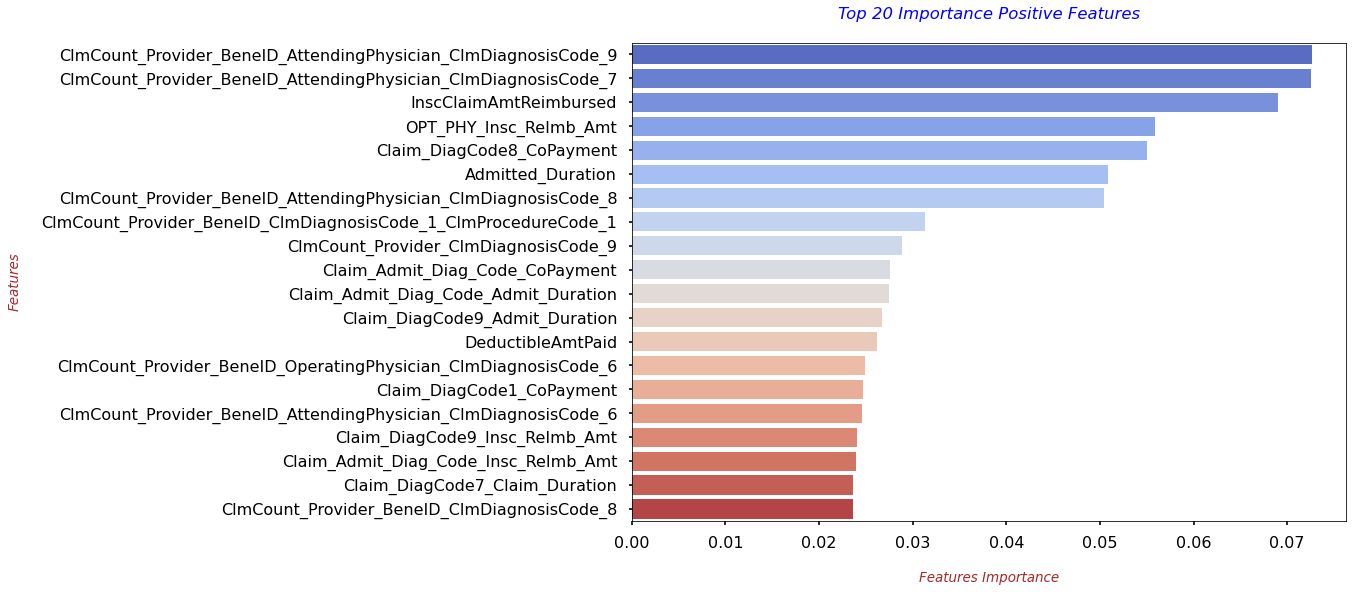

In [46]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats_5, x=top_20_pos_feats_scores_5, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 20 Importance Positive Features\n", fontdict=title_font_dict)

In [47]:
result_feats_scrs_5 = pd.DataFrame({'Feature': top_20_pos_feats_5, 'Imp_Score': top_20_pos_feats_scores_5})
result_feats_scrs_5

,Feature,Imp_Score
149,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.072654
147,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.072564
0,InscClaimAmtReimbursed,0.069001
34,OPT_PHY_Insc_ReImb_Amt,0.055903
96,Claim_DiagCode8_CoPayment,0.055016
10,Admitted_Duration,0.050864
148,ClmCount_Provider_BeneID_AttendingPhysician_Cl...,0.050422
167,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_Cl...,0.031336
137,ClmCount_Provider_ClmDiagnosisCode_9,0.028810
44,Claim_Admit_Diag_Code_CoPayment,0.027584


#### **`6. Random Forest Classifier`**
- **Random State = 60**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=60,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, np.ravel(y_train))

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=60)

### Train AUC = 0.9475867234385374
### Test AUC = 0.9524076260837093


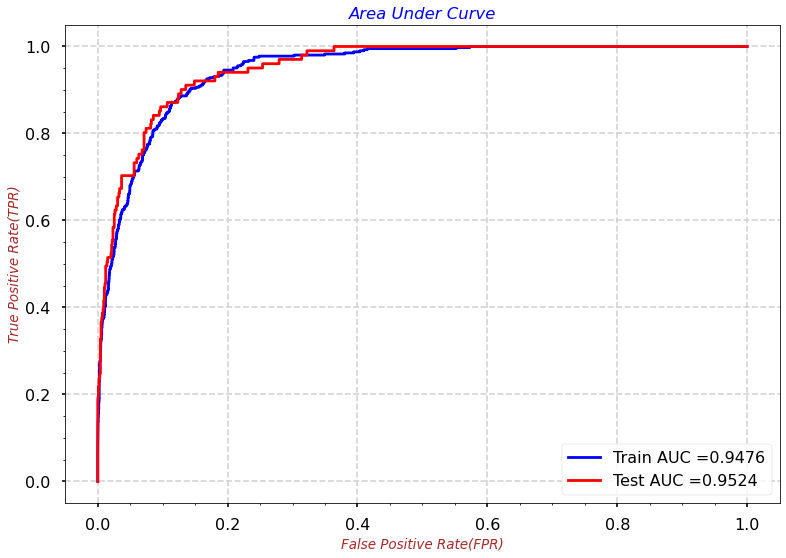

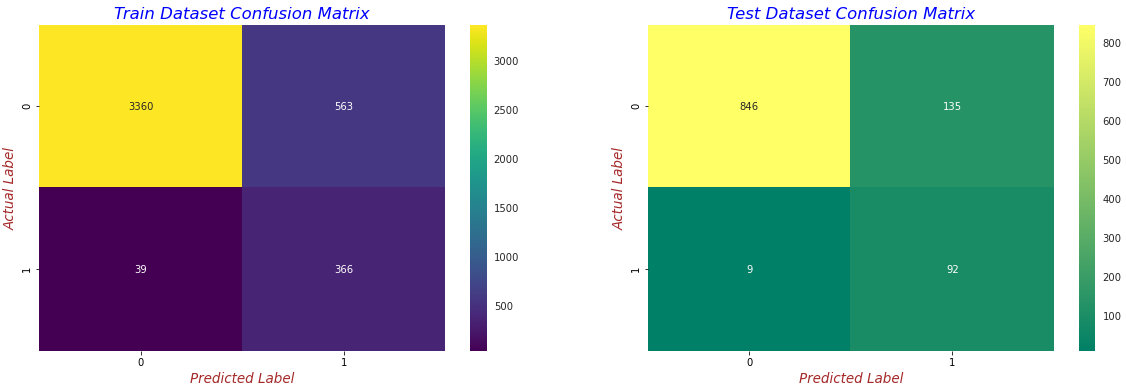



### Best Threshold = 0.5036
### Model AUC is : 0.9524
### Model Train F1 Score is : 0.5487
### Model Test F1 Score is : 0.5610


In [50]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, np.ravel(y_train), np.ravel(y_test))

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [51]:
feats_imps_6 = pd.DataFrame({'Features': X_train_std.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps_6 = feats_imps_6[feats_imps_6['Importance_Model_1'] != 0]
feats_imps_6.reset_index(drop=True, inplace=True)
feats_imps_6.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,1.327369e-02
1,DeductibleAmtPaid,8.623519e-02
2,RenalDiseaseIndicator,2.277232e-04
3,ChronicCond_Alzheimer,5.152067e-17
4,ChronicCond_Heartfailure,1.609222e-04


In [52]:
top_20_pos_feats_6 = feats_imps_6.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores_6 = feats_imps_6.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

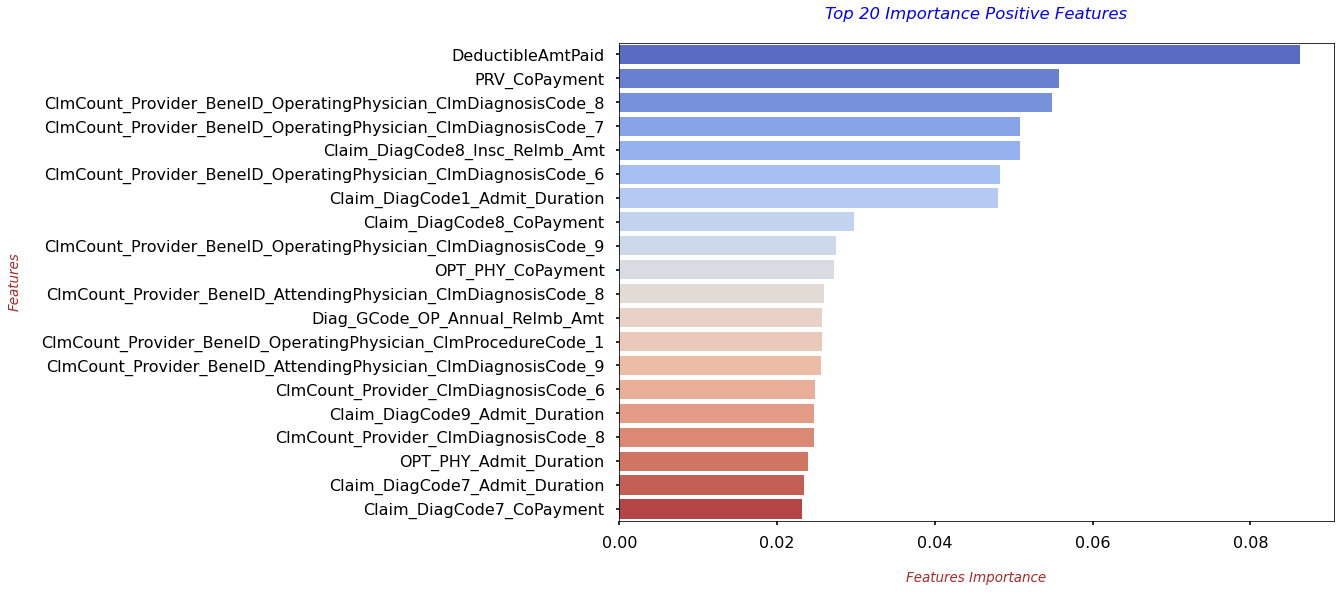

In [53]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats_6, x=top_20_pos_feats_scores_6, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 20 Importance Positive Features\n", fontdict=title_font_dict)

In [54]:
result_feats_scrs_6 = pd.DataFrame({'Feature': top_20_pos_feats_6, 'Imp_Score': top_20_pos_feats_scores_6})
result_feats_scrs_6

,Feature,Imp_Score
1,DeductibleAmtPaid,0.086235
18,PRV_CoPayment,0.055755
152,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.054814
151,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.050792
96,Claim_DiagCode8_Insc_ReImb_Amt,0.050776
150,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.048267
63,Claim_DiagCode1_Admit_Duration,0.047990
97,Claim_DiagCode8_CoPayment,0.029690
153,ClmCount_Provider_BeneID_OperatingPhysician_Cl...,0.027484
36,OPT_PHY_CoPayment,0.027186


### **`Most Important Features`**

In [55]:
most_imp_features = list(set(top_20_pos_feats_1[0:8]).\
                         union(set(top_20_pos_feats_2[0:8])).\
                         union(set(top_20_pos_feats_3[0:8])).\
                         union(set(top_20_pos_feats_4[0:8])).\
                         union(set(top_20_pos_feats_5[0:8])).\
                         union(set(top_20_pos_feats_6[0:8])))

In [56]:
len(most_imp_features)

24

In [57]:
most_imp_features

['DeductibleAmtPaid',
 'ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_8',
 'ClmCount_Provider_ClmDiagnosisCode_7',
 'ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_8',
 'Admitted_Duration',
 'OPT_PHY_CoPayment',
 'ClmCount_Provider_BeneID_ClmDiagnosisCode_9',
 'PRV_CoPayment',
 'Claim_DiagCode8_IP_Annual_ReImb_Amt',
 'Claim_DiagCode1_Admit_Duration',
 'ClmCount_Provider_BeneID_ClmDiagnosisCode_7',
 'ClmCount_Provider_BeneID_ClmDiagnosisCode_8',
 'Claim_DiagCode8_Insc_ReImb_Amt',
 'ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9',
 'ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9',
 'ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1',
 'OPT_PHY_Insc_ReImb_Amt',
 'ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_7',
 'InscClaimAmtReimbursed',
 'ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_7',
 'ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_6',
 'Claim_DiagCode8_Admit_Duratio

### **`SUMMARY`**

- **Above are the top-21 mostly used features for performing the binary classifications by the model.**

- **Above I have also displayed the different random state models have quite similar behavior which tells us that Model is doing good!!**

### **`OBSERVATIONS`**

- Above important features of the Models tells us that:
    - More preference is given to Diagnosis Code 6,7,8 and 9.
    - Out of all the procedure codes the first procedure code is preferred more.
    - Operating physician Re-Imb Claim Amount and Co-payment both have higher importance.